In [8]:
from google.colab import drive

drive.mount('/content/gdrive/')

%cd /content/gdrive/My Drive/Colab Notebooks/BAMT-GAN/visualization/

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
[Errno 2] No such file or directory: '/content/gdrive/My Drive/Colab Notebooks/BAMT-GAN/visualization/'
/content


In [9]:
pwd

'/content'

#데이터 시각화

In [3]:
import pandas as pd

##샘플 크기 별 성능 비교

In [ ]:
acc = [85,88,88.3,89]
auc = [85,88,88,89]
f1_score = [85,88,88,89]
model = ['adult1000', 'adult5000', 'adult10000','adult20000']
df = pd.DataFrame({'ACC' : acc, 'AUC' : auc, 'F1-score' : f1_score}, index = model)
df

,ACC,AUC,F1-score
adult1000,85.0,85,85
adult5000,88.0,88,88
adult10000,88.3,88,88
adult20000,89.0,89,89


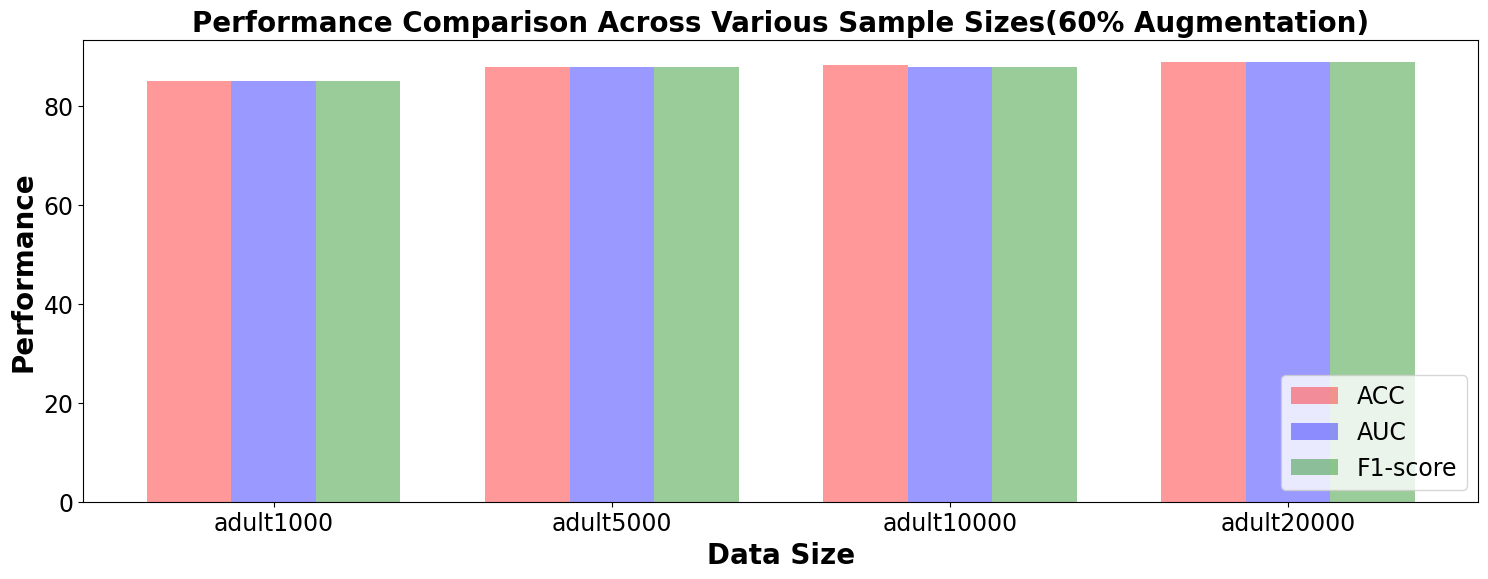

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(18,6))
bar_width = 0.25


index = np.arange(4)

plt.rc('font', size=17)

b1 = plt.bar(index, df['ACC'], bar_width, alpha=0.4, color='red', label='ACC')

b2 = plt.bar(index + bar_width, df['AUC'], bar_width, alpha=0.4, color='blue', label='AUC')

b3 = plt.bar(index + 2 * bar_width, df['F1-score'], bar_width, alpha=0.4, color='green', label='F1-score')


plt.xticks(np.arange(bar_width, 4 + bar_width, 1), model)

plt.ylabel('Performance', size = 20,fontweight='bold')
plt.xlabel('Data Size', size = 20,fontweight='bold')
plt.title("Performance Comparison Across Various Sample Sizes(60% Augmentation)",size=20,fontweight='bold')
plt.legend(loc='lower right')
plt.show()

##클래스 비율

In [ ]:
import matplotlib.pyplot as plt

def plot_distribution(df, target, color_dict,title):
    label_counts = df[target].value_counts()
    plt.figure(figsize=(8, 5))
    plt.bar(label_counts.index.astype(str), label_counts.values, color=[color_dict[i] for i in label_counts.index])
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(list(map(str, label_counts.index)))
    plt.show()

# 사용 예시
color_dict = {0: '#4287f5', 1: '#f54269'}  # 클래스에 따른 색상 지정

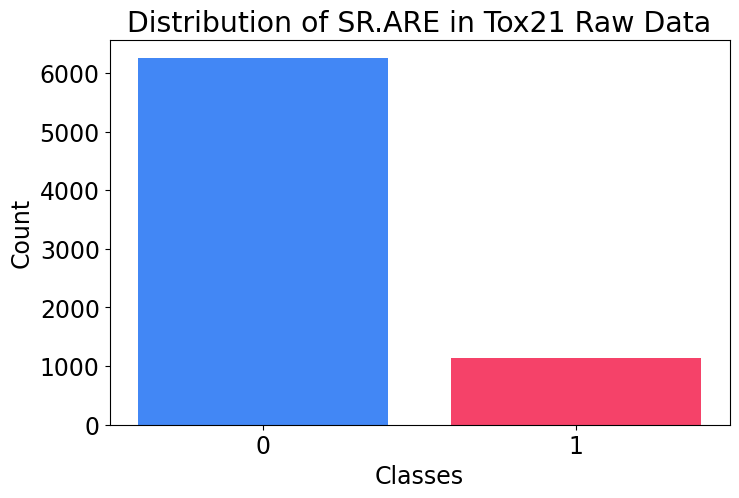

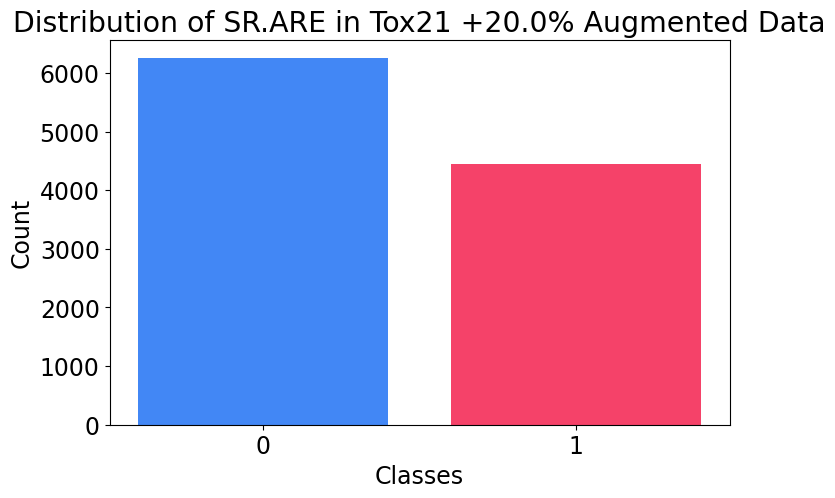

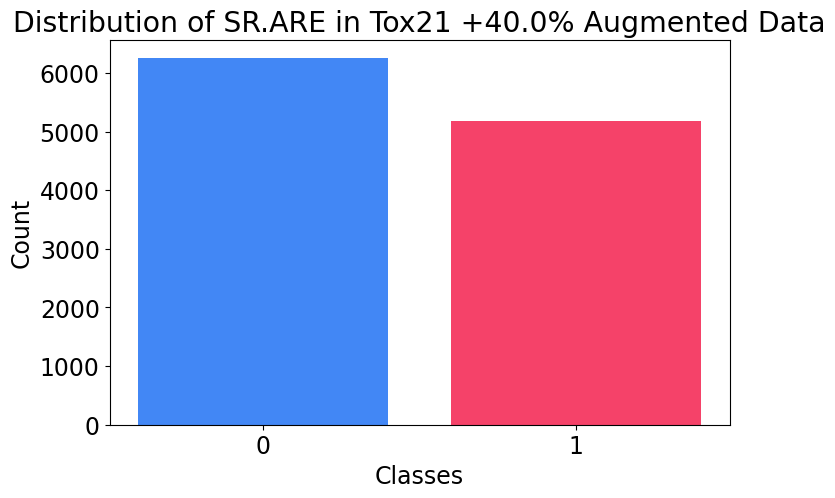

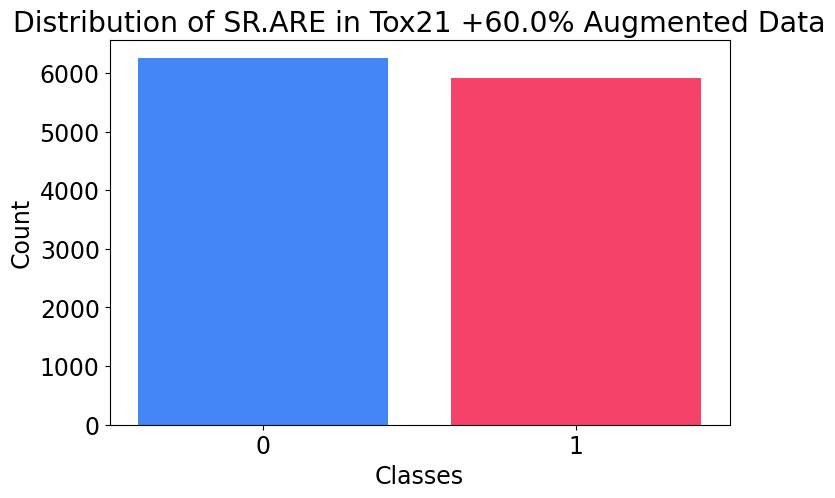

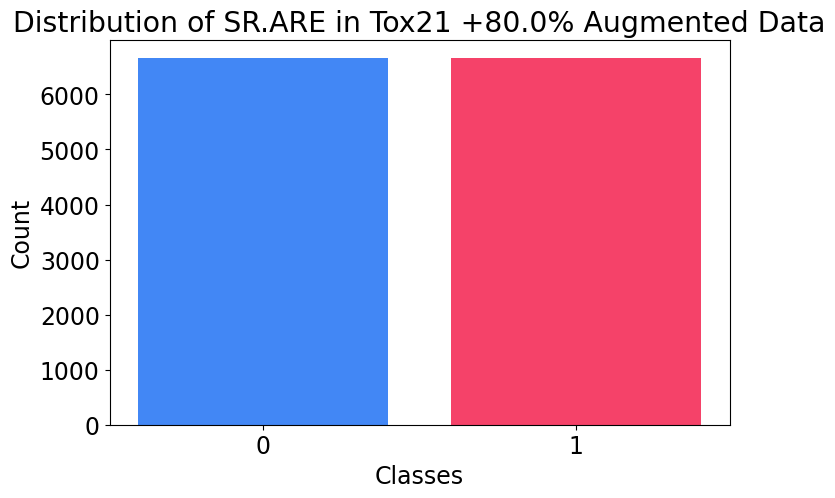

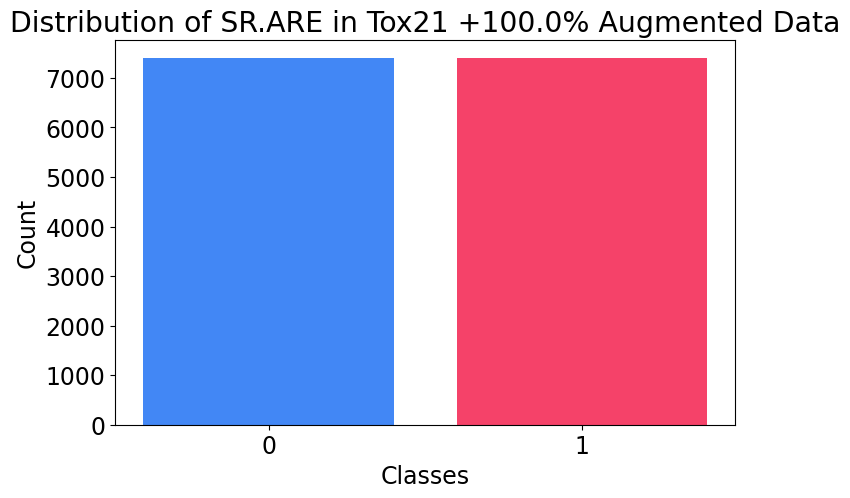

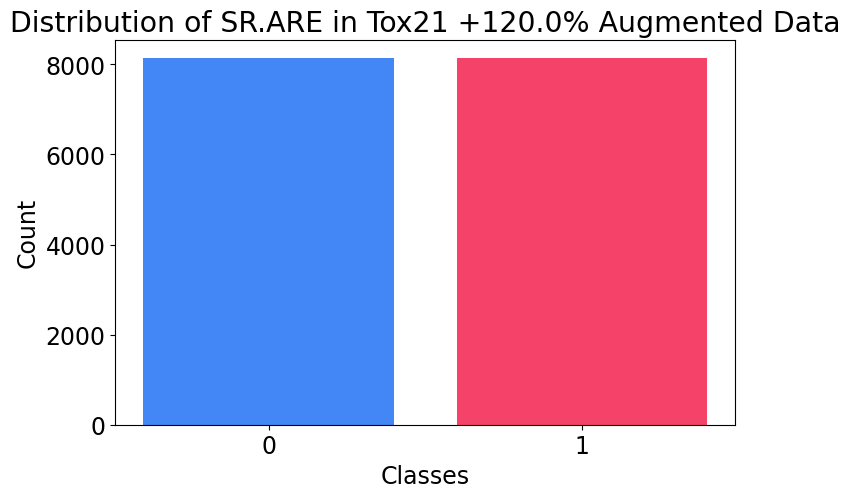

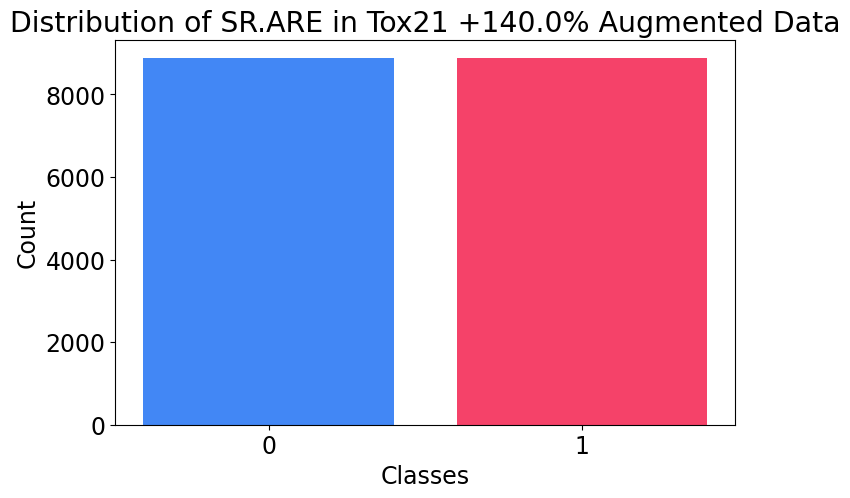

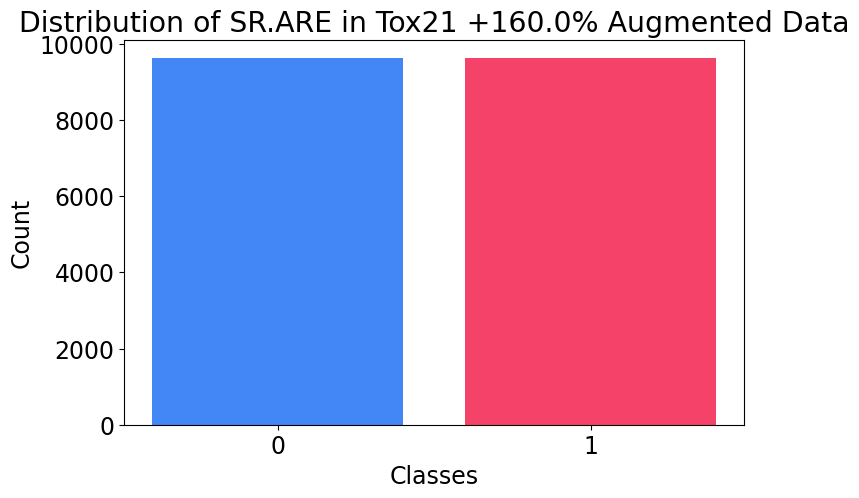

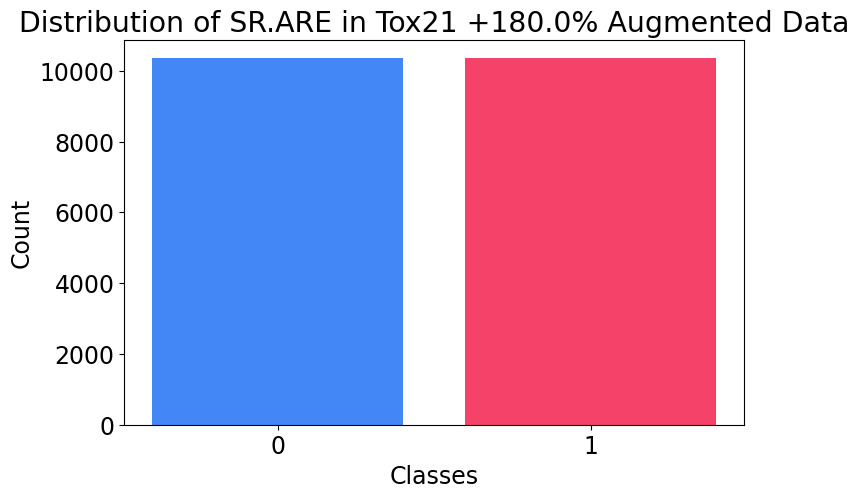

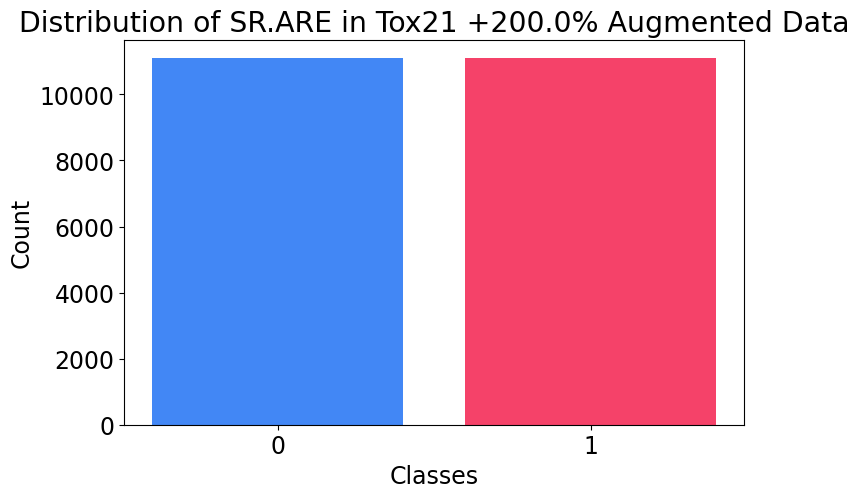

In [ ]:
tox21_raw = pd.read_csv('../data/tox21.csv')
plot_distribution(tox21_raw, 'SR.ARE', color_dict,'Distribution of SR.ARE in Tox21 Raw Data')

augmented_ratio = [0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]
for i in augmented_ratio:
  plot_distribution(pd.read_csv('../augmented_data/tox21/'+str(i)+'tox21_bamtgan.csv'), 'SR.ARE', color_dict,'Distribution of SR.ARE in Tox21 +'+str(i*100)+'% Augmented Data')
